# Feature engineering

---

## Fundamentals of ETL: data extraction, transformation and loading


Applied Mathematical Modeling in Banking

---

# Table of contents

---

# 1. What's Feature Engineering?


`Feature engineering` is the most important technique used in creating machine learning models. 

Feature Engineering is a basic term used to cover many operations that are performed on the variables(features) to fit them into the algorithm. **It helps in increasing the accuracy** of the model thereby enhances the results of the predictions. Feature Engineered machine learning models perform better on data than basic machine learning models. The following aspects of feature engineering are as follows [1]:

1. `Feature Scaling`: It is done to get the features on the same scale( for eg. Euclidean distance).
2. `Feature Transformation`: It is done to normalize the data(feature) by a function.
3. `Feature Construction`: It is done to create new features based on original descriptors to improve the accuracy of the predictive model.

A `"feature"` in the context of predictive modeling is just another name for a `predictor variable`. Feature engineering is the general term for creating and manipulating predictors so that a good predictive model can be created.

---

# 2. Feature Scaling

`Feature Scaling` refers to putting the values in the same range or same scale so that no variable is dominated by the other.

Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem.

If left alone, these algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, 5kg and 5000gms. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.

Here’s the curious thing about feature scaling – it improves (significantly) the performance of some machine learning algorithms and does not work at all for others.

Also, what’s the difference between normalization and standardization? These are two of the most commonly used feature scaling techniques in machine learning but a level of ambiguity exists in their understanding. 

---

## 2.1. Normalization

### Theory

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

Here’s the formula for normalization:

<center>$X' = \frac{X-X_{min}}{X_{max} - X_{min}}$</center>

Here, $X_{max}$ and $X_{min}$ are the maximum and the minimum values of the feature respectively.

When the value of $X$ is the minimum value in the column, the numerator will be $0$, and hence $X'$ is $0$.

On the other hand, when the value of $X$ is the maximum value in the column, the numerator is equal to the denominator and thus the value of $X'$ is $1$.

If the value of $X$ is between the minimum and the maximum value, then the value of $X'$ is between $0$ and $1$.

---

### Practice

So, let's implement own normalization function.

In [35]:
# Lets use client churn dataset from telco: https://www.kaggle.com/blastchar/telco-customer-churn
churn_data <- read.csv("data/telecom_users.csv")
head(churn_data)

,X,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.1,1734.65,No
2,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
3,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
4,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.9,238.50,No
5,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No
6,2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.20,No


In [36]:
str(churn_data)

'data.frame':	5986 obs. of  22 variables:
 $ X               : int  1869 4528 6344 6739 432 2215 5260 6001 1480 5137 ...
 $ customerID      : chr  "7010-BRBUU" "9688-YGXVR" "9286-DOJGF" "6994-KERXL" ...
 $ gender          : chr  "Male" "Female" "Female" "Male" ...
 $ SeniorCitizen   : int  0 0 1 0 0 0 0 0 0 1 ...
 $ Partner         : chr  "Yes" "No" "Yes" "No" ...
 $ Dependents      : chr  "Yes" "No" "No" "No" ...
 $ tenure          : int  72 44 38 4 2 70 33 1 39 55 ...
 $ PhoneService    : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ MultipleLines   : chr  "Yes" "No" "Yes" "No" ...
 $ InternetService : chr  "No" "Fiber optic" "Fiber optic" "DSL" ...
 $ OnlineSecurity  : chr  "No internet service" "No" "No" "No" ...
 $ OnlineBackup    : chr  "No internet service" "Yes" "No" "No" ...
 $ DeviceProtection: chr  "No internet service" "Yes" "No" "No" ...
 $ TechSupport     : chr  "No internet service" "No" "No" "No" ...
 $ StreamingTV     : chr  "No internet service" "Yes" "No" "No" ...
 $ Streaming

In [37]:
# next check summary of values
summary(churn_data)

# check tenure field

       X         customerID           gender          SeniorCitizen   
 Min.   :   0   Length:5986        Length:5986        Min.   :0.0000  
 1st Qu.:1777   Class :character   Class :character   1st Qu.:0.0000  
 Median :3546   Mode  :character   Mode  :character   Median :0.0000  
 Mean   :3534                                         Mean   :0.1614  
 3rd Qu.:5292                                         3rd Qu.:0.0000  
 Max.   :7042                                         Max.   :1.0000  
                                                                      
   Partner           Dependents            tenure      PhoneService      
 Length:5986        Length:5986        Min.   : 0.00   Length:5986       
 Class :character   Class :character   1st Qu.: 9.00   Class :character  
 Mode  :character   Mode  :character   Median :29.00   Mode  :character  
                                       Mean   :32.47                     
                                       3rd Qu.:56.00          

Next, lets build histogram of `Income` and check how it splited with `ggplot2`:

In [25]:
#install.packages("ggplot2")
library(ggplot2)

Warning message:
"Removed 10 rows containing non-finite values (stat_bin)."


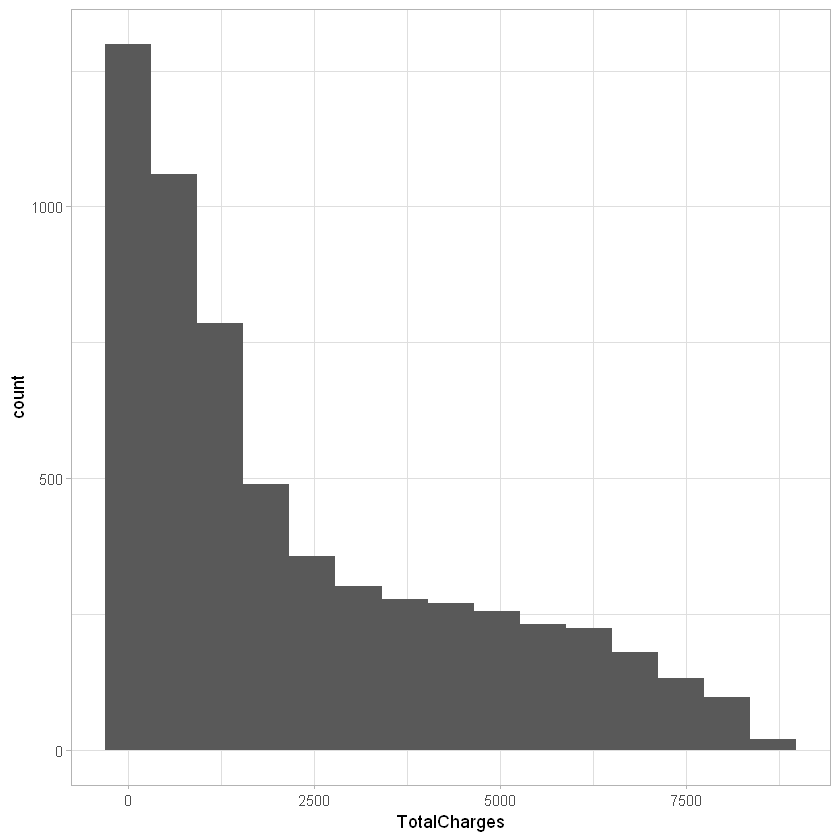

In [42]:
ggplot(churn_data, aes(x=TotalCharges)) + geom_histogram(bins = 15) + theme_set(theme_light())

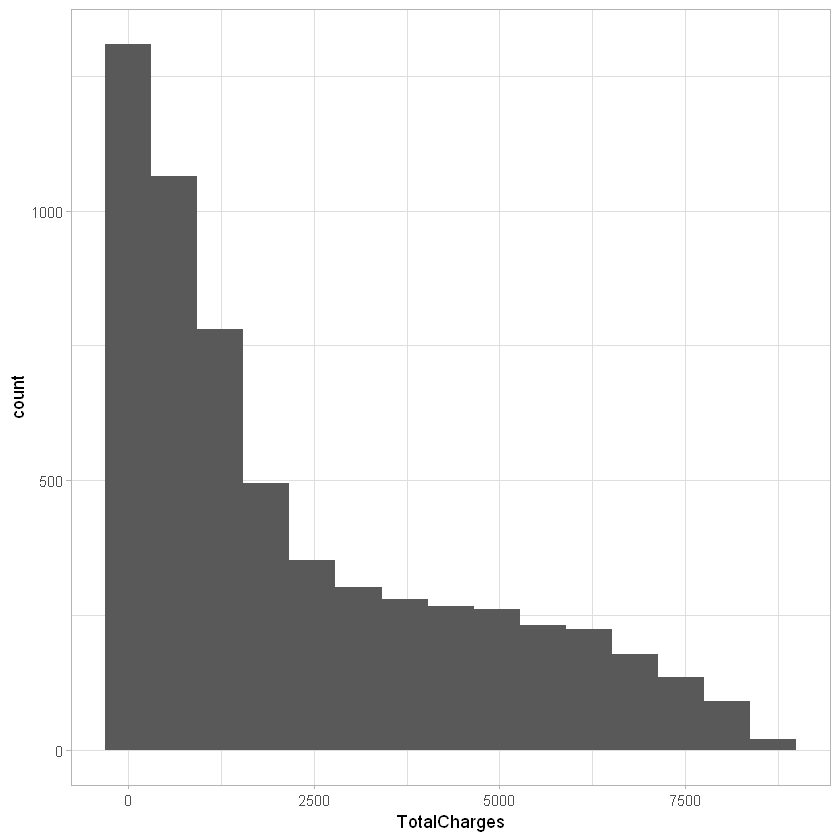

In [46]:
# Lets replace missing with 0 zero for TotalCharges

churn_data <- churn_data %>%
            mutate(TotalCharges = ifelse(is.na(TotalCharges), 0 , TotalCharges))

ggplot(churn_data, aes(x=TotalCharges)) + geom_histogram(bins = 15) + theme_set(theme_light()) # we dont have warnings for now

In [47]:
# Lets implement own normalization function by fomula explained earlie
normalizeData <- function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
}

In [50]:
library(dplyr)
library(magrittr) # for pipe %>% operator

# Normalize TotalCharges
churn_data <- churn_data %>%
    mutate(TotalChargesNorm = normalizeData(TotalCharges))

churn_data %>% head() # check the last columns

,X,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesNorm
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.1,1734.65,No,0.19973402
2,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,0.45748895
3,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,0.33044515
4,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,Yes,Month-to-month,Yes,Electronic check,55.9,238.50,No,0.02746177
5,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,0.01375967
6,2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,...,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.20,No,0.38805730


In [53]:
#summary for the last field
summary(churn_data$TotalChargesNorm)

#its from 1 to zero

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.04624 0.16219 0.26417 0.44232 1.00000 

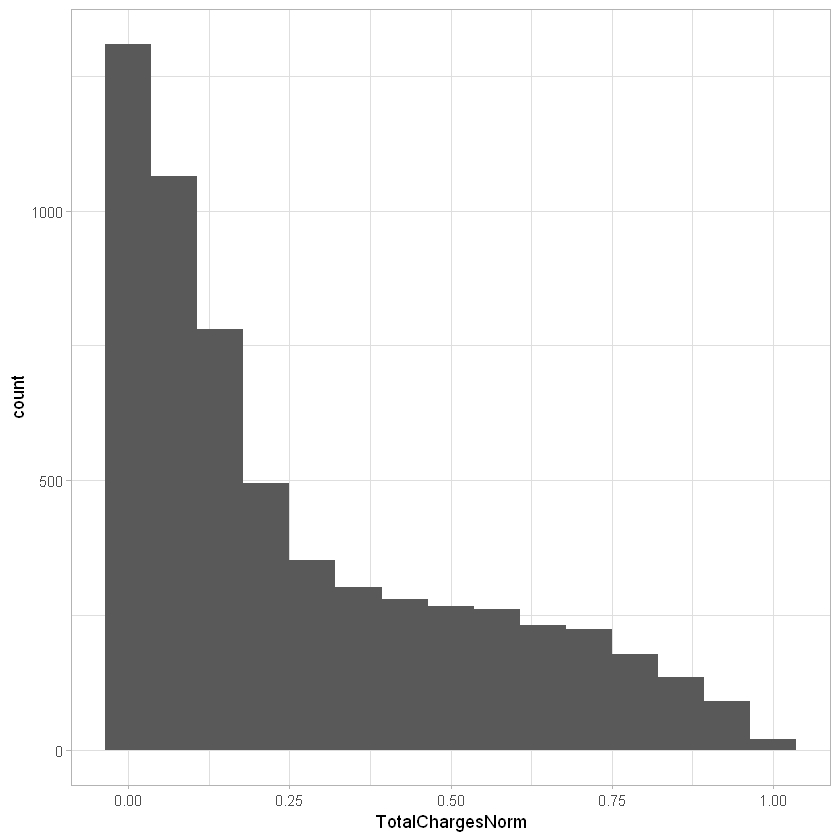

In [56]:
# And lets make a histogram
ggplot(churn_data, aes(x=TotalChargesNorm)) + geom_histogram(bins = 15) + theme_set(theme_light())

We observe identical histograms even though the `TotalCharges / TotalChargesNorm` axis is rescaled.

Therefore we show that **normalization didn't affect the distribution properties** of the rescaled data.

---

## 2.2. Standardization

`Standardization` is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Here’s the formula for standardization:

<center>$X' = \frac{X-\mu}{\sigma}$</center>

Feature scaling: $\mu$ is the mean of the feature values and Feature scaling: $\sigma$ is the standard deviation of the feature values. Note that in this case, the values are not restricted to a particular range.

Now, the big question in your mind must be when should we use normalization and when should we use standardization?

Normalization vs. standardization is an eternal question among machine learning newcomers. Let me elaborate on the answer in this section.

Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.
However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.

It is a good practice to fit the scaler on the training data and then use it to transform the testing data. This would avoid any data leakage during the model testing process. Also, the scaling of target values is generally not required.

## 1.3. Feature scaling in R

# 2. Feature Transformation

`Feature transformation` involves manipulating a predictor variable in some way so as to improve its performance in the predictive model. A variety of considerations come into play when transforming models, including:

- [x] The `flexibility` of machine learning and statistical models in dealing with different types of data. For example, some techniques require that the input data be in numeric format, whereas others can deal with other formats, such as categorical, text, or dates.
- [x] `Ease of interpretation`. A predictive model where all the predictors are on the same scale (e.g., have a mean of 0 and a standard deviation of 1), can make interpretation easier.
- [x] `Predictive accuracy`. Some transformations of variables can improve the accuracy of prediction (e.g., rather than including a numeric variable as a predictor, instead include both it and a second variable that is its square).
- [x] `Theory`. For example, economic theory dictates that in many situations the natural logarithm of data representing prices and quantities should be used.
- [x] `Computational error`. Many algorithms are written in such a way that "large" numbers cause them to give the wrong result, where "large" may not be so large (e.g., more than 10 or less than -10).

## 3. Feature Construction

The **`feature Construction`** method helps in creating new features in the data thereby increasing model accuracy and overall predictions. It is of two types:

- [x] `Binning`: Bins are created for continuous variables.
- [x] `Encoding`: Numerical variables or features are formed from categorical variables.
- [x] `Caluculation` ?????

### 3.1. Binning

`Binning` is done to create bins for continuous variables where they are converted to categorical variables. There are two types of binning: `Unsupervised` and `Supervised`.

`Unsupervised Binning` involves Automatic and Manual binning. In Automatic Binning, bins are created without human interference and are created automatically.  In Manual Binning, bins are created with human interference and we specify where the bins to be created.

`Supervised Binning` involves creating bins for the continuous variable while taking the target variable into the consideration also.

### 3.2. Encoding

`Encoding` is the process in which numerical variables or features are created from `categorical` variables. It is a widely used method in the industry and in every model building process. It is of two types: `Label Encoding` and `One-hot Encoding`.

`Label Encoding` involves assigning each label a unique integer or value based on alphabetical ordering. It is the most popular and widely used encoding.

`One-hot Encoding` involves creating additional features or variables on the basis of unique values in categorical variables i.e. every unique value in the category will be added as a new feature.

### 3.2.1. On-hot encoding

In [57]:
# Lets use client churn dataset from telco: https://www.kaggle.com/blastchar/telco-customer-churn
churn_data <- read.csv("data/telecom_users.csv")
head(churn_data)

,X,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.1,1734.65,No
2,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
3,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
4,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.9,238.50,No
5,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No
6,2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.20,No


In [58]:
# check possible Gender values
gmodels::CrossTable(churn_data$gender)


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  5986 

 
          |    Female |      Male | 
          |-----------|-----------|
          |      2936 |      3050 | 
          |     0.490 |     0.510 | 
          |-----------|-----------|



 


Lets create two additional variables `Male` and `Female` encoded by 1 / 0:

- [x] Create a Male column that encodes each row corresponding to male as 1 and set everything else to 0.
- [x] Create a Female column that encodes each row corresponding to female as 1 and set everything else to 0.

In [73]:
# if gender is factor
#churn_data <- churn_data %>% 
   #     mutate(gender = as.character(gender)) # convert Gender to character from Factor

churn_data <- churn_data %>% 
        mutate(
            # create Male column
            Male = ifelse(gender == "Male", 1, 0),
            # create Female column
            Female = ifelse(gender == "Female", 1, 0))

head(churn_data)

,X,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,Female
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,Two year,No,Credit card (automatic),24.1,1734.65,No,1,0
2,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,0,1
3,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,0,1
4,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,Yes,Month-to-month,Yes,Electronic check,55.9,238.50,No,1,0
5,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,1,0
6,2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,...,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.20,No,0,1


Lets create a dummy variables for `InternetService` column. So, what data it has for now?

In [74]:
gmodels::CrossTable(churn_data$InternetService)


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  5986 

 
            |         DSL | Fiber optic |          No | 
            |-------------|-------------|-------------|
            |        2068 |        2627 |        1291 | 
            |       0.345 |       0.439 |       0.216 | 
            |-------------|-------------|-------------|



 


The function `dummyVars()` from `caret` package can be used to generate a complete (less than full rank parameterized) set of dummy variables from one or more factors. The function takes a formula and a data set and outputs an object that can be used to create the dummy variables using the predict method.

In [77]:
library(caret)
dummy <- dummyVars(" ~ InternetService", data = churn_data)
new_df <- data.frame(predict(dummy, newdata = churn_data)) # precit dummy variables and
new_df %>% head()

,InternetServiceDSL,InternetServiceFiber.optic,InternetServiceNo
,<dbl>,<dbl>,<dbl>
1,0,0,1
2,0,1,0
3,0,1,0
4,1,0,0
5,1,0,0
6,1,0,0


If you want create dummy variables for all categoriacal columns just use `" ~ ."` formula.

If you need some few do this:

In [78]:
dummy <- dummyVars(" ~ InternetService + PhoneService", data = churn_data)
new_df <- data.frame(predict(dummy, newdata = churn_data)) # precit dummy variables and
new_df %>% head()

,InternetServiceDSL,InternetServiceFiber.optic,InternetServiceNo,PhoneServiceNo,PhoneServiceYes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,1,0,1
2,0,1,0,0,1
3,0,1,0,0,1
4,1,0,0,0,1
5,1,0,0,0,1
6,1,0,0,1,0


---

## References

1. [Feature Engineering in R Programming](https://www.geeksforgeeks.org/feature-engineering-in-r-programming/) by @dhruv5819
2. [What is Feature Engineering?](https://www.displayr.com/what-is-feature-engineering/) by Tim Bok
3. [Feature Scaling-Why it is required?](https://medium.com/@rahul77349/feature-scaling-why-it-is-required-8a93df1af310) by Rahul Saini
4. [Feature Scaling for Machine Learning: Understanding the Difference Between Normalization vs. Standardization](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/) by 
ANIRUDDHA BHANDARI